<a href="https://colab.research.google.com/github/Felipe-Oliveira11/TensorFlow-Callbacks/blob/master/Callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalMaxPool2D

import time 
import datetime
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
# padronização 
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
seed_value = 42

<br>
<br>

### CallBacks

Um retorno de chamada é uma ferramenta poderosa para personalizar o comportamento de um modelo Keras durante o treinamento, avaliação ou inferência.


Os retornos de chamada são úteis para obter uma visão dos estados internos e das estatísticas do modelo durante o treinamento.

<br>

#### 1. Retornos de chamada personalizados subclassificando a classe de retorno de chamada.¶
Esses retornos de chamada estão na classe base "tf.keras.callbacks". Ao subclassificar esses retornos de chamada, podemos executar determinadas funções quando o treinamento / lote / época foi iniciado ou encerrado.

Para isso, podemos substituir a função de classes de retorno de chamada. O nome dessas funções é auto-explicar seu comportamento. Por exemplo, def on_train_begin (), isso significa o que fazer quando o treinamento começar. Vamos ver abaixo como substituir essas funções. Também podemos monitorar logs e executar determinadas ações, geralmente no início ou no final do treinamento / lote / épocas.

<br>

In [7]:
from tensorflow.keras.callbacks import Callback

In [8]:
# image shape
image_rows = 28
image_cols = 28
image_shape = (image_rows, image_cols,1)


# Reshape | (28,28,1)
X_train = X_train.reshape(X_train.shape[0], *image_shape)
X_test = X_test.reshape(X_test.shape[0], *image_shape)

In [9]:
#image shape
X_train.shape

(60000, 28, 28, 1)

In [10]:
# 1.criar a arquitetura

def get_model():
  # CNN 
  model = Sequential()
  model.add(Input(shape=(image_shape)))
  model.add(Conv2D(32, (3,3), activation='relu', padding='SAME'))
  model.add(Dropout(0.20))
  model.add(Conv2D(32, (3,3), activation='relu', padding='SAME'))
  model.add(MaxPool2D(2,2))
  model.add(Conv2D(64, (3,3), activation='relu', padding='SAME'))
  model.add(Dropout(0.30))
  model.add(Conv2D(64, (3,3), activation='relu', padding='SAME'))
  model.add(MaxPool2D(2,2))
  model.add(GlobalMaxPool2D())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  # compile
  model.compile(optimizer=Adam(0.01),
                loss=SparseCategoricalCrossentropy(),
                metrics=['accuracy'])
  
  return model 


# instânciando CNN
model = get_model()
model.summary()  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        3

In [11]:
# CustomCallback 

class CustomCallback(Callback):
  def on_train_begin(self,logs=None):
      print("Treino iniciado em, no tempo {}".format(datetime.datetime.now().time()))
  def on_train_end(self, logs=None):
      print("Treino finalizado no tempo de {}".format(datetime.datetime.now().time()))
  def on_train_batch_begin(self, batch, logs=None):
      print('Treinamento: batch {} iniciou com {}'.format(batch, datetime.datetime.now().time()))
  def on_train_batch_end(self, batch, logs=None):
      print('Treinamento: batch {} terminou com {}'.format(batch, datetime.datetime.now().time()))


custom_callback = CustomCallback()

In [12]:
model = get_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[custom_callback])

Treino iniciado em, no tempo 11:57:56.067029
Treinamento: batch 0 iniciou com 11:57:56.134541
Treinamento: batch 0 terminou com 11:57:57.014132
   1/1875 [..............................] - ETA: 0s - loss: 2.2762 - accuracy: 0.0938Treinamento: batch 1 iniciou com 11:57:57.015573
Treinamento: batch 1 terminou com 11:57:57.147998
   2/1875 [..............................] - ETA: 2:05 - loss: 3.2153 - accuracy: 0.1094Treinamento: batch 2 iniciou com 11:57:57.149242
Treinamento: batch 2 terminou com 11:57:57.283245
   3/1875 [..............................] - ETA: 2:47 - loss: 2.9510 - accuracy: 0.1042Treinamento: batch 3 iniciou com 11:57:57.284528
Treinamento: batch 3 terminou com 11:57:57.421602
   4/1875 [..............................] - ETA: 3:10 - loss: 2.7884 - accuracy: 0.1250Treinamento: batch 4 iniciou com 11:57:57.422849
Treinamento: batch 4 terminou com 11:57:57.559857
   5/1875 [..............................] - ETA: 3:24 - loss: 2.6896 - accuracy: 0.1063Treinamento: batch 5 i

<br>
<br>
<br>


### 2. EarlyStopping Callback 

<br>

EarlyStopping é uma forma de regularização usada para evitar ajustes excessivos(Overfitting) ao treinar uma rede com um método iterativo, como descida em gradiente. 

Esses métodos atualizam a rede para melhor ajustá-lo aos dados de treinamento a cada iteração. Até certo ponto, isso melhora o desempenho da rede em dados fora do conjunto de treinamento. 
<br>

Depois desse ponto, no entanto, melhorar o ajuste da rede aos dados de treinamento custa às custas do aumento do erro de generalização. As regras de EarlyStopping fornecem orientações sobre quantas iterações podem ser executadas antes que a rede comece a se ajustar demais. As regras de EarlyStopping foram empregadas em muitos métodos diferentes de ML, com quantidades variadas de fundamentação teórica.

<br>

<br>

Parâmetros: 

* "monitor", você pode passar a perda ou a métrica. Geralmente, passamos por val_loss e monitoramos.

* "min_delta" você pode passar um número inteiro nesse argumento. Em palavras simples, você está dizendo ao retorno de chamada que o modelo não está melhorando se não estiver diminuindo mais / menos que a perda / métrica.

* "pacient", significa quantas épocas esperar. E depois disso, se não houver melhoria observada no desempenho do modelo de acordo com o valor de “delta mínimo”, pare o treinamento.

* "mode" Por padrão, é definido como "automático", o que é útil quando você lida com a perda / métrica personalizada. Portanto, você pode dizer ao retorno de chamada se o modelo está melhorando quando sua perda / métrica personalizada está diminuindo e, em seguida, defina-o como "min" ou aumentando e defina-o como "max".


<br>

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
early_stopping = EarlyStopping(monitor='val_loss',
                               mode='min',
                               min_delta=0.001,
                               patience=5
                               )

model = get_model()
history = model.fit(X_train, y_train,
          epochs=20,
          batch_size=64,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping])

Epoch 1/20
938/938 [==============================] - 248s 264ms/step - loss: 0.7021 - accuracy: 0.7340 - val_loss: 0.5719 - val_accuracy: 0.7840
Epoch 2/20
938/938 [==============================] - 249s 265ms/step - loss: 0.4771 - accuracy: 0.8222 - val_loss: 0.4106 - val_accuracy: 0.8434
Epoch 3/20
938/938 [==============================] - 248s 264ms/step - loss: 0.4437 - accuracy: 0.8309 - val_loss: 0.4147 - val_accuracy: 0.8404
Epoch 4/20
938/938 [==============================] - 248s 264ms/step - loss: 0.4367 - accuracy: 0.8357 - val_loss: 0.4337 - val_accuracy: 0.8314
Epoch 5/20
938/938 [==============================] - 248s 265ms/step - loss: 0.4275 - accuracy: 0.8400 - val_loss: 0.4101 - val_accuracy: 0.8480
Epoch 6/20
938/938 [==============================] - 251s 268ms/step - loss: 0.4223 - accuracy: 0.8433 - val_loss: 0.4092 - val_accuracy: 0.8518
Epoch 7/20
938/938 [==============================] - 248s 264ms/step - loss: 0.4173 - accuracy: 0.8460 - val_loss: 0.3691 -

In [15]:
# epochs executadas 
len(history.history['loss'])

12

In [16]:
# métricas 
pred = model.predict(X_test)
y_pred = np.argmax(pred, axis=1)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1000
           1       0.99      0.94      0.97      1000
           2       0.75      0.79      0.77      1000
           3       0.74      0.94      0.83      1000
           4       0.72      0.71      0.72      1000
           5       0.99      0.93      0.96      1000
           6       0.72      0.50      0.59      1000
           7       0.88      0.98      0.93      1000
           8       0.97      0.96      0.97      1000
           9       0.97      0.93      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



Text(0, 0.5, 'Acurácia')

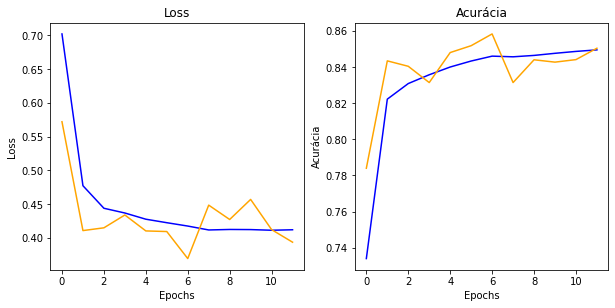

In [17]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.title('Loss')
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.subplot(2,2,2)
plt.title('Acurácia')
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='orange')
plt.xlabel('Epochs')
plt.ylabel('Acurácia')

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)       

<br>
<br>
<hr>
<br>
<br>


### ReduceLROnPlateau.

<br>

Esse retorno de chamada é usado para reduzir a taxa de aprendizado se não houver nenhuma melhoria na perda / métrica.

Os argumentos são:

* "monitor" está definido para essa perda / métrica como uma sequência da qual estamos reduzindo o aprendizado, caso não melhore.

* “factor” Você pode passar um número inteiro nesse argumento e dizer que sua taxa de aprendizado atual é LR; se não houver nenhuma melhoria observada na perda / métrica monitorada, o aprendizado diminuirá com esse “fator”. ou seja, new_lr = lr * factor

* "Verbose" Você pode definir detalhado = 1 para ver a taxa de aprendizado em todas as épocas. Ou detalhado = 0 para desativá-lo.


* O argumento min_delta e mode são os mesmos que os explicados nos argumentos do EarlyStopping Callback.


<br>

In [19]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [20]:
%%time 

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.1,
                              patience=10,
                              min_delta=0.001)

model = get_model()
model.fit(X_train, y_train,
          epochs=5,
          validation_data=(X_test, y_test),
          callbacks=[reduce_lr])

Epoch 1/5
1875/1875 [==============================] - 258s 137ms/step - loss: 2.3041 - accuracy: 0.0979 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/5
1875/1875 [==============================] - 261s 139ms/step - loss: 2.3039 - accuracy: 0.0985 - val_loss: 2.3049 - val_accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 265s 142ms/step - loss: 2.3039 - accuracy: 0.0984 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 4/5
1875/1875 [==============================] - 262s 140ms/step - loss: 2.3040 - accuracy: 0.1012 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 5/5
1875/1875 [==============================] - 262s 140ms/step - loss: 2.3041 - accuracy: 0.0980 - val_loss: 2.3046 - val_accuracy: 0.1000
CPU times: user 39min 32s, sys: 1min 5s, total: 40min 37s
Wall time: 21min 50s


<br>
<br>
<hr>
<br>
<br>



### ModelCheckPoint 

<br> 

Vamos imaginar que você está treinando um modelo pesado como BERT no colab, e isso exige muito tempo para o treinamento. Então, você começou o treinamento do modelo e foi dormir. E então, na manhã seguinte, você acorda e abre sua colab. Mas você verá a mensagem "Runtime Disconnect" na tela. Para esse problema, o ModelCheckpoint vem como um salvador em nossa vida. Podemos salvar os pontos de verificação no final de cada época. Para que possamos carregar os pesos ou retomar o treinamento se algo terrível acontecer durante o treinamento.

<br>

Então, vamos ver como podemos usar esse retorno de chamada. Podemos salvar o ponto de verificação do modelo no formato Keras h5 / hd5 ou no formato TensorFlow pb. Se você passar o argumento "filepath = model.h5" (extensão. H5), ele será salvo no formato Keras ou "filepath = model.pb" (extensão .pb) para salvar no formato do modelo TensorFlow.

<br>

Além disso, existem duas opções para salvar o ponto de verificação: você pode salvar toda a arquitetura + pesos ou apenas os pesos. Você pode fazer isso definindo "save_only_weights = True" ou "save_only_weights = False"



<br>

In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [22]:
model_checkpoint = ModelCheckpoint(filepath='cnn.h5',
                                   monitor='val_loss',
                                   save_freq='epoch')


model = get_model()
model.fit(X_train, y_train,
          epochs=5,
          validation_data=(X_test, y_test),
          callbacks=[model_checkpoint])

Epoch 1/5
1875/1875 [==============================] - 257s 137ms/step - loss: 0.7808 - accuracy: 0.7105 - val_loss: 0.5551 - val_accuracy: 0.8066
Epoch 2/5
1875/1875 [==============================] - 259s 138ms/step - loss: 0.5375 - accuracy: 0.8042 - val_loss: 0.5744 - val_accuracy: 0.7839
Epoch 3/5
1875/1875 [==============================] - 260s 139ms/step - loss: 0.5207 - accuracy: 0.8108 - val_loss: 0.4902 - val_accuracy: 0.8173
Epoch 4/5
1875/1875 [==============================] - 260s 139ms/step - loss: 0.5139 - accuracy: 0.8131 - val_loss: 0.4640 - val_accuracy: 0.8302
Epoch 5/5
1875/1875 [==============================] - 260s 139ms/step - loss: 0.4981 - accuracy: 0.8199 - val_loss: 0.4693 - val_accuracy: 0.8323


In [23]:
# salvando modelo 
model.save('cnn', save_format='tf')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: cnn/assets


In [24]:
# carregando modelo no disco 
reconstructed_model = load_model('cnn')